In [138]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [139]:
df = pd.read_csv('iris.data',header=None)
df.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [140]:
df.shape

(150, 5)

In [141]:
df.isnull().sum()

0    0
1    0
2    0
3    0
4    0
dtype: int64

In [142]:
df.columns = ['sepal length','sepal width','petal length','petal width','class']

In [143]:
df.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [144]:
df['class'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: class, dtype: int64

In [145]:
df['class'].replace({'Iris-versicolor':1,'Iris-virginica':2,'Iris-setosa':3},inplace=True)
df.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,3
1,4.9,3.0,1.4,0.2,3
2,4.7,3.2,1.3,0.2,3
3,4.6,3.1,1.5,0.2,3
4,5.0,3.6,1.4,0.2,3


In [146]:
df.describe()

,sepal length,sepal width,petal length,petal width,class
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,2.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,1.000000
25%,5.100000,2.800000,1.600000,0.300000,1.000000
50%,5.800000,3.000000,4.350000,1.300000,2.000000
75%,6.400000,3.300000,5.100000,1.800000,3.000000
max,7.900000,4.400000,6.900000,2.500000,3.000000


# Visualization

<AxesSubplot:>

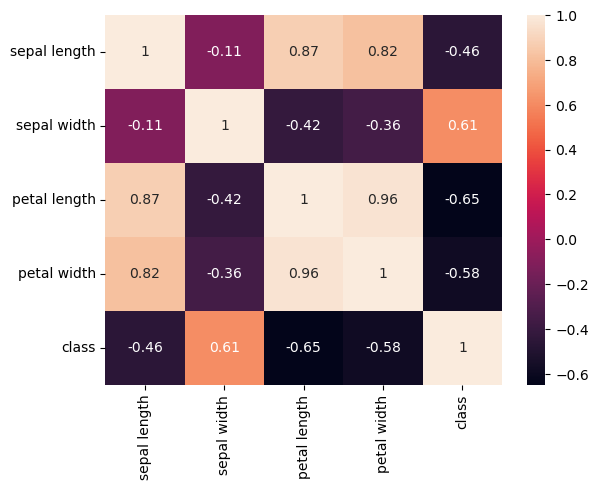

In [147]:
# Correlation
sns.heatmap(df.corr(),annot=True)

C:\Users\vkumbhakar\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 1500x1200 with 0 Axes>

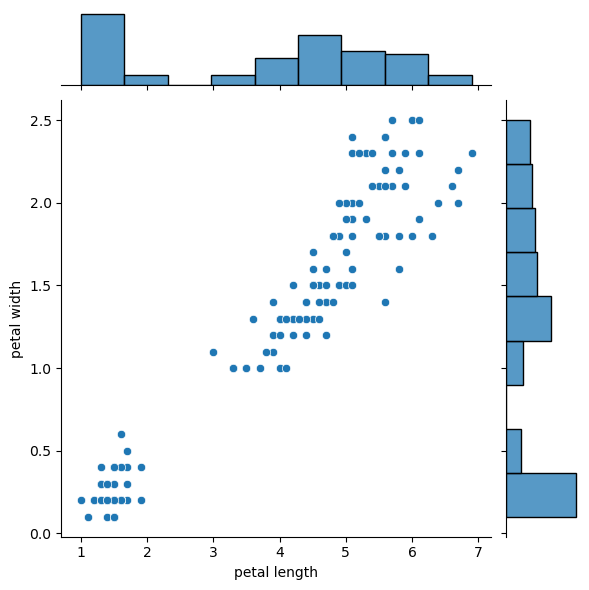

In [148]:
# Direct relation between petal length and petal width
plt.figure(figsize=(15,12))
sns.jointplot(df["petal length"],df['petal width'])

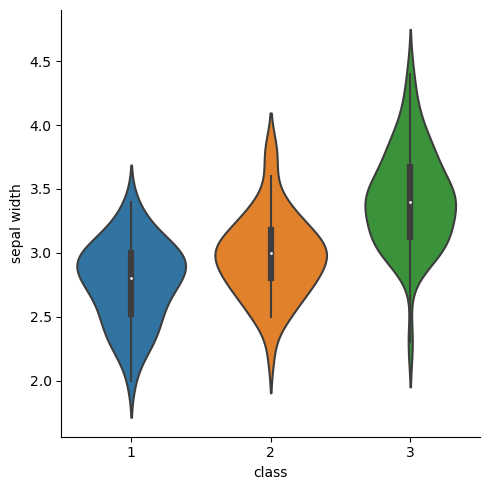

In [149]:
# data variation from median
sns.catplot(data=df,y='sepal width', x='class', kind='violin')

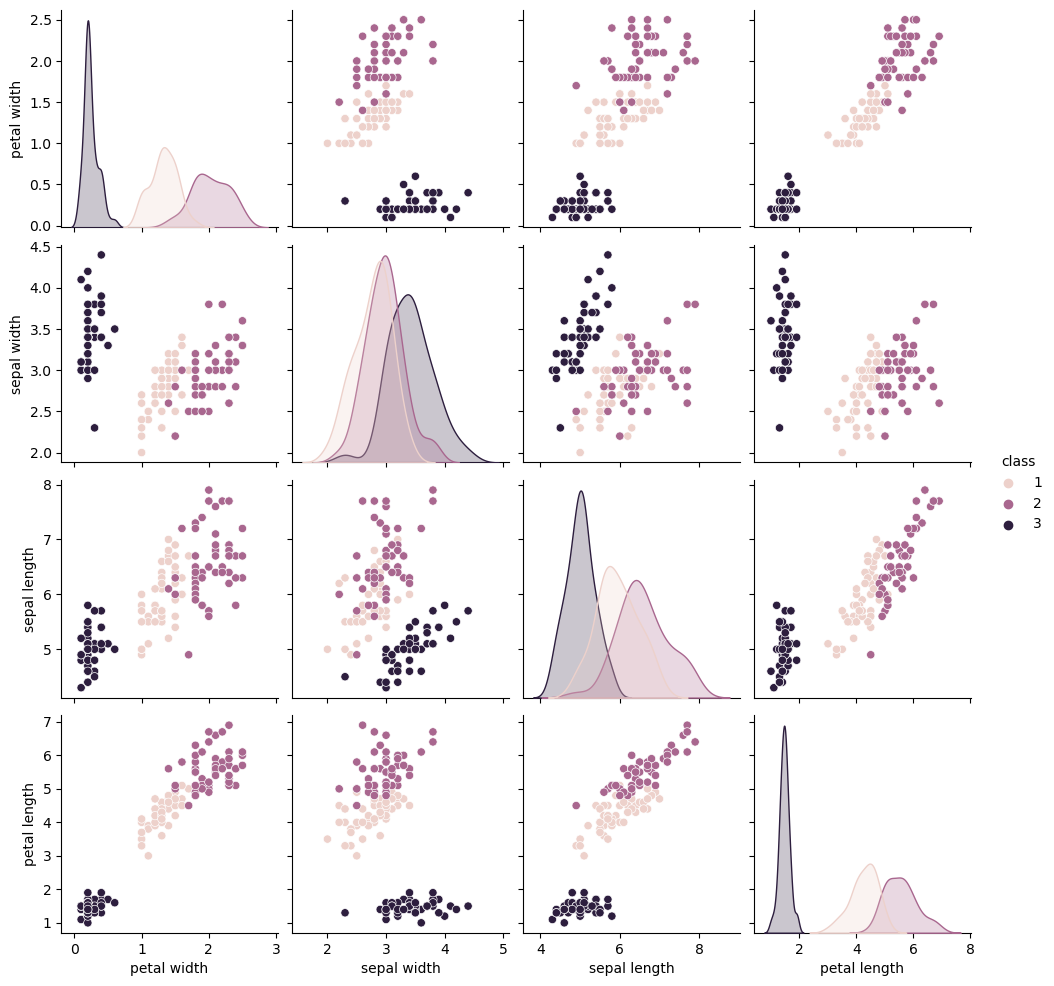

In [150]:
# 
sns.pairplot(data=df[['petal width','sepal width','sepal length','petal length','class']],hue='class')

<AxesSubplot:>

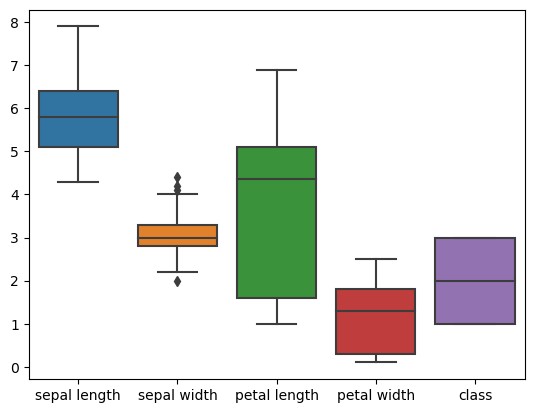

In [151]:
# Outliers
sns.boxplot(data=df)

In [152]:
def outlier_removal(column,dataframe):
    modified_column = []
    q1 = dataframe[column].quantile(0.25)
    q2 = dataframe[column].quantile(0.50)
    q3 = dataframe[column].quantile(0.75)
    iqr = (q3-q1)*1.5
    upper = iqr+q3
    lower = q1-iqr
    for i in dataframe[column]:
        if i<=upper and i>=lower:
            modified_column.append(i)
        else:
            modified_column.append(q2)
    return modified_column

In [153]:
for i in df:
    df[i]=outlier_removal(i,df)

<AxesSubplot:>

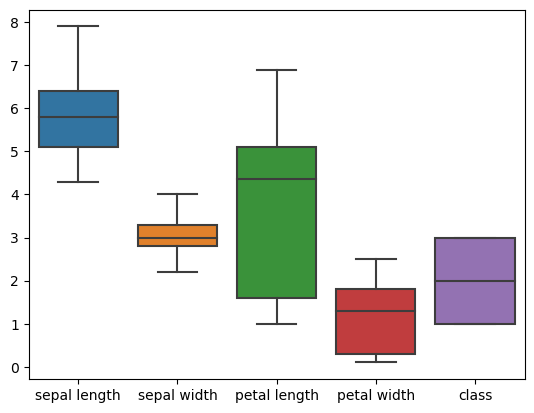

In [154]:
sns.boxplot(data=df)